In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

import nfl_data_py as nfl


In [2]:
teams = nfl.import_team_desc()

In [3]:
# Create a dataframe of two columns: a random number 1-100 and then the team_logo_wikipedia from teams dataframe
df = pd.DataFrame({'rand': np.random.randint(1, 100, len(teams)), 'team_logo_wikipedia': teams['team_logo_wikipedia']})

In [4]:
df

,rand,team_logo_wikipedia
0,2,https://upload.wikimedia.org/wikipedia/en/thum...
1,1,https://upload.wikimedia.org/wikipedia/en/thum...
2,43,https://upload.wikimedia.org/wikipedia/en/thum...
3,81,https://upload.wikimedia.org/wikipedia/en/thum...
4,93,https://upload.wikimedia.org/wikipedia/en/thum...
5,97,https://upload.wikimedia.org/wikipedia/commons...
6,20,https://upload.wikimedia.org/wikipedia/commons...
7,4,https://upload.wikimedia.org/wikipedia/en/thum...
8,40,https://upload.wikimedia.org/wikipedia/commons...
9,15,https://upload.wikimedia.org/wikipedia/en/thum...


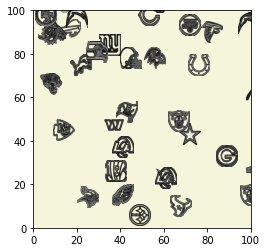

In [10]:
import pandas as pd
from skimage import filters, feature, color
from PIL import Image
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import ssl
from scipy.ndimage import gaussian_filter

# Assuming df is your DataFrame
# df = pd.DataFrame(...)

# Ignore SSL certificate errors (for https images)
ssl._create_default_https_context = ssl._create_unverified_context

fig, ax = plt.subplots()

# Generate random x, y coordinates for the images
x = np.random.randint(0, 100, size=len(df))
y = np.random.randint(0, 100, size=len(df))

# Set the plot background color to beige
ax.set_facecolor('beige')

for i, row in df.iterrows():
    with urllib.request.urlopen(row['team_logo_wikipedia']) as url:
        image = Image.open(url)

    # Convert the image to grayscale
    image = image.convert('L')

    # Convert the image into a numpy array so that skimage can work with it
    image_array = np.array(image)

    # Apply the Sobel edge detection filter
    edges = filters.sobel(image_array)

    # Apply a Gaussian blur to the edges
    edges = gaussian_filter(edges, sigma=1.0)

    # Transform edges to 3D for RGB-A image
    edges_rgb = np.stack([edges]*3, axis=-1)

    # Create an alpha channel based on edges
    # Adjust the threshold value (0.02) to control the ink effect
    alpha = (edges > 0.02).astype(float)

    # Stack RGB and Alpha to create final image
    final_image = np.concatenate([edges_rgb, alpha[..., None]], axis=-1)

    # Display the image at a random location on the plot
    ax.imshow(final_image, extent=(x[i], x[i] + 10, y[i], y[i] + 10))

# Set plot limits
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

plt.show()
